# Analyze post-test questionnaires

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as op
import glob

# for plotting
sns.set(style='whitegrid', context='poster')
%matplotlib inline

# R for stats
%load_ext rpy2.ipython
%R require(lme4)
%R require(lmerTest)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array([1], dtype=int32)

In [12]:
dirs = dict()
dirs['basedir'] = op.join(op.expanduser('~'), 'Experiments/SST')
dirs['datadir'] = op.join(dirs['basedir'], 'data')
dirs['analydir'] = op.join(dirs['basedir'], 'analysis')
dirs['subj_info_file'] = op.join(dirs['datadir'], 'subj_info.csv')

In [13]:
subj_info = pd.read_csv(dirs['subj_info_file'])
subj_info = subj_info[pd.isnull(subj_info.remove)]
subj_info[['subid']] = subj_info.subid.astype(str)

subj_info

,subid,group,voltage,remove
0,1,pilot,0,NaN
1,2,pilot,0,NaN
2,3,pilot,0,NaN
3,4,pilot,0,NaN
4,5,pilot,0,NaN
5,6,pilot,0,NaN
6,7,pilot,0,NaN
7,8,pilot,0,NaN


In [14]:
dq = pd.DataFrame() 
questionnaires = ['QSR', 'QSR2']

for subid in subj_info.subid:
    print subid

    for questionnaire in questionnaires:
        # add test file
        qfile = glob.glob(op.join(dirs['datadir'], 'Quest', 'SST_' + 
                                  subid + '_post1_*_' + questionnaire + '.xls'))[0]
        d2 = pd.read_csv(qfile, sep='\t')
        d2['subid'] = subid
        dq = dq.append(d2, ignore_index=True)
        

1
2
3
4
5
6
7
8


In [15]:
dq = dq[['subid', 'questionLabel', 'subScaleName', 'adjustedRating']]
dq.head()

,subid,questionLabel,subScaleName,adjustedRating
0,1,Q1,generalSOD,1
1,1,Q2,generalSOD,1
2,1,Q3a,route,4
3,1,Q3b,landmark,5
4,1,Q3c,survey,3


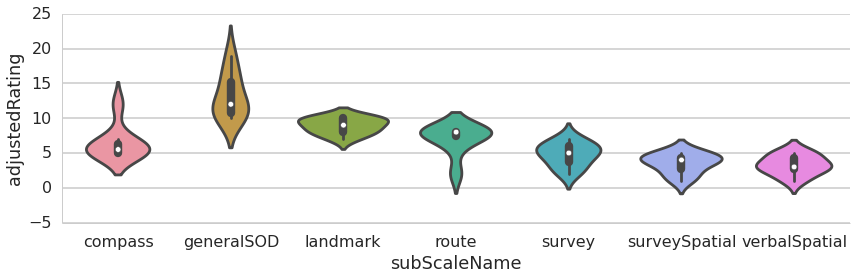

In [16]:
data = dq.groupby(['subid', 'subScaleName']).sum().reset_index()
sns.factorplot(x='subScaleName', y='adjustedRating', aspect=3,
               kind='violin', 
               units='subid', ci=68, data=data)

## Compute survey - landmark score

In [17]:
data = dq.groupby(['subid', 'subScaleName']).sum().reset_index()
data = data.pivot(index='subid', columns='subScaleName', values='adjustedRating').reset_index()
data

subScaleName,subid,compass,generalSOD,landmark,route,survey,surveySpatial,verbalSpatial
0,1,6,11,10,8,6,5,3
1,2,5,12,10,8,5,4,2
2,3,5,15,8,8,4,2,5
3,4,7,16,9,8,7,4,3
4,5,5,10,8,2,2,5,1
5,6,12,19,10,8,5,1,5
6,7,5,10,7,8,6,3,3
7,8,6,12,9,6,3,4,4


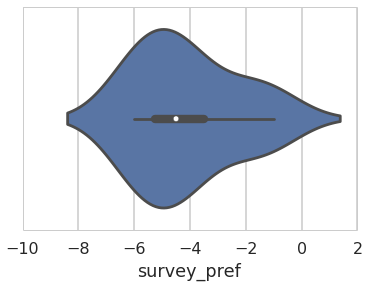

In [18]:
data['survey_pref'] = data.survey - data.landmark
sns.violinplot(data.survey_pref)

In [20]:
data

subScaleName,subid,compass,generalSOD,landmark,route,survey,surveySpatial,verbalSpatial,survey_pref
0,1,6,11,10,8,6,5,3,-4
1,2,5,12,10,8,5,4,2,-5
2,3,5,15,8,8,4,2,5,-4
3,4,7,16,9,8,7,4,3,-2
4,5,5,10,8,2,2,5,1,-6
5,6,12,19,10,8,5,1,5,-5
6,7,5,10,7,8,6,3,3,-1
7,8,6,12,9,6,3,4,4,-6


In [19]:
file_tosave = op.join(dirs['datadir'], 'Quest/Questionnaires_group.csv')
data.to_csv(file_tosave)